In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino'],'size':16})
rc('text', usetex=True)

## F1 for halton and random approaches, with validation data (without training)

In [2]:
F1_halton = np.load("/home/rpezoa/experiment_data/output/F1_halton_full.npy")
F1_random = np.load("/home/rpezoa/experiment_data/output/F1_random_full.npy")


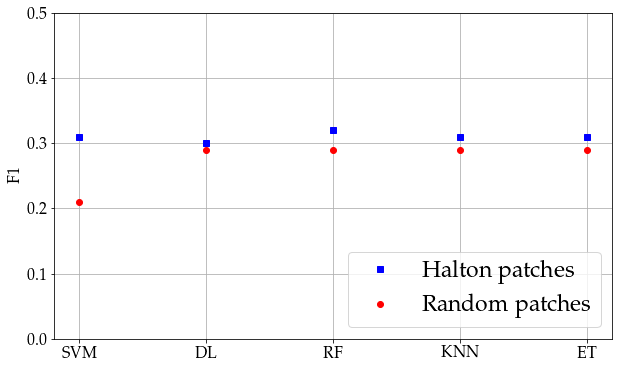

[ 0.31  0.3   0.32  0.31  0.31]
[ 0.21  0.29  0.29  0.29  0.29]


In [3]:
F1_halton_means =np.round(F1_halton.mean(axis=0),2)
F1_random_means= np.round(F1_random.mean(axis=0),2)

plt.figure(figsize=(10,6))
plt.plot(F1_halton_means,'sb',label='Halton patches')
plt.plot(F1_random_means,'or', label="Random patches")
#baseLine = [0.04,0.04,0.04,0.04,0.04]
#plt.plot(baseLine,'g-', label="Random classifier" )
plt.legend(loc='lower right', fontsize='x-large')
plt.grid()
plt.ylabel("F1")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],["SVM", "DL", "RF", "KNN", "ET"])
plt.show()

print(F1_halton_means)
print(F1_random_means)

(60, 10)


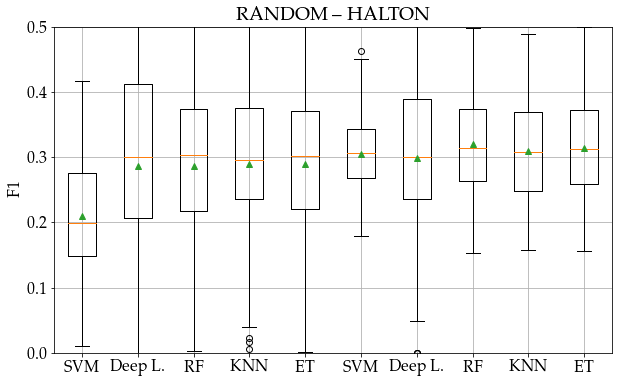

In [54]:
new = np.concatenate((F1_random,F1_halton),axis=1)
print(new.shape)

plt.figure(figsize=(10,6))
plt.boxplot(new,showmeans=True)
plt.grid()
plt.title("RANDOM -- HALTON")
plt.ylabel("F1")
plt.ylim(0,0.5)
plt.xticks(range(1,11),["SVM", "Deep L.", "RF", "KNN", "ET"]*2)
plt.show()

## Analysis performed with testing data without eliminating training data

In [3]:
f1_halton_SVM = np.load("/home/rpezoa/experiment_data/output/f1_halton_svm_0.npy")
prec_halton_SVM = np.load("/home/rpezoa/experiment_data/output/prec_halton_svm_0.npy")

f1_halton_Deep = np.load("/home/rpezoa/experiment_data/output/f1_halton_deep_0.npy")
prec_halton_Deep = np.load("/home/rpezoa/experiment_data/output/prec_halton_deep_0.npy")

f1_halton_rf = np.load("/home/rpezoa/experiment_data/output/f1_halton_rf_0.npy")
prec_halton_rf = np.load("/home/rpezoa/experiment_data/output/prec_halton_rf.npy")

f1_halton_knn = np.load("/home/rpezoa/experiment_data/output/f1_halton_knn_0.npy")
prec_halton_knn = np.load("/home/rpezoa/experiment_data/output/prec_halton_knn_0.npy")

f1_halton_et = np.load("/home/rpezoa/experiment_data/output/f1_halton_et_0.npy")
prec_halton_et = np.load("/home/rpezoa/experiment_data/output/prec_halton_et_0.npy")

                    
                        

In [43]:
print(f1_halton_SVM.mean())
print(prec_halton_SVM.mean())

print(f1_random_SVM.mean())
print(prec_random_SVM.mean())

0.328159167488
0.360060038127
0.218041660603
0.261043176871


In [17]:
#print(f1_halton_Deep.shape)
F1 = np.zeros((60,5))
F1[:,0] = f1_halton_SVM.ravel()
F1[:,1] = f1_halton_Deep.ravel()
F1[:,2] = f1_halton_rf.ravel()
F1[:,3] = f1_halton_knn.ravel()
F1[:,4] = f1_halton_et.ravel()

F1_r = np.zeros((60,5))
F1_r[:,0] = f1_random_SVM.ravel()
F1_r[:,1] = f1_random_Deep.ravel()
F1_r[:,2] = f1_random_rf.ravel()
F1_r[:,3] = f1_random_knn.ravel()
F1_r[:,4] = f1_random_et.ravel()


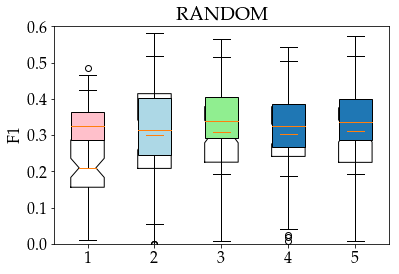

(60, 10)


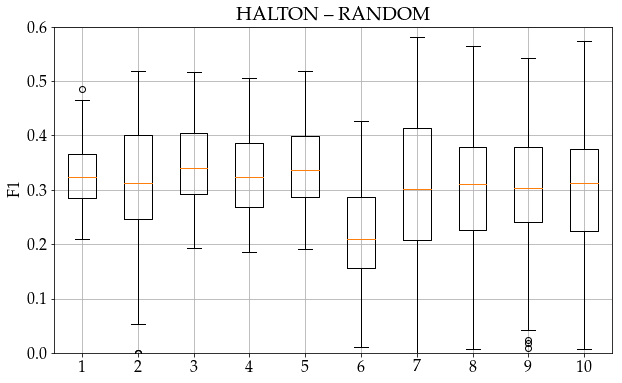

In [39]:
plt.figure()
bp1 = plt.boxplot(F1,patch_artist=True)
plt.grid()
plt.ylabel("F1")
plt.title("HALTON")
plt.ylim(0,0.6)


colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bp1,bp1):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.boxplot(F1_r,"g")
plt.grid()
plt.title("RANDOM")
plt.ylabel("F1")
plt.ylim(0,0.6)
plt.show()

new = np.concatenate((F1,F1_r),axis=1)
print(new.shape)

plt.figure(figsize=(10,6))
plt.boxplot(new)
plt.grid()
plt.title("HALTON -- RANDOM")
plt.ylabel("F1")
plt.ylim(0,0.6)
plt.show()

## Halton Patches: F1 and precision SVM, Deep and RF

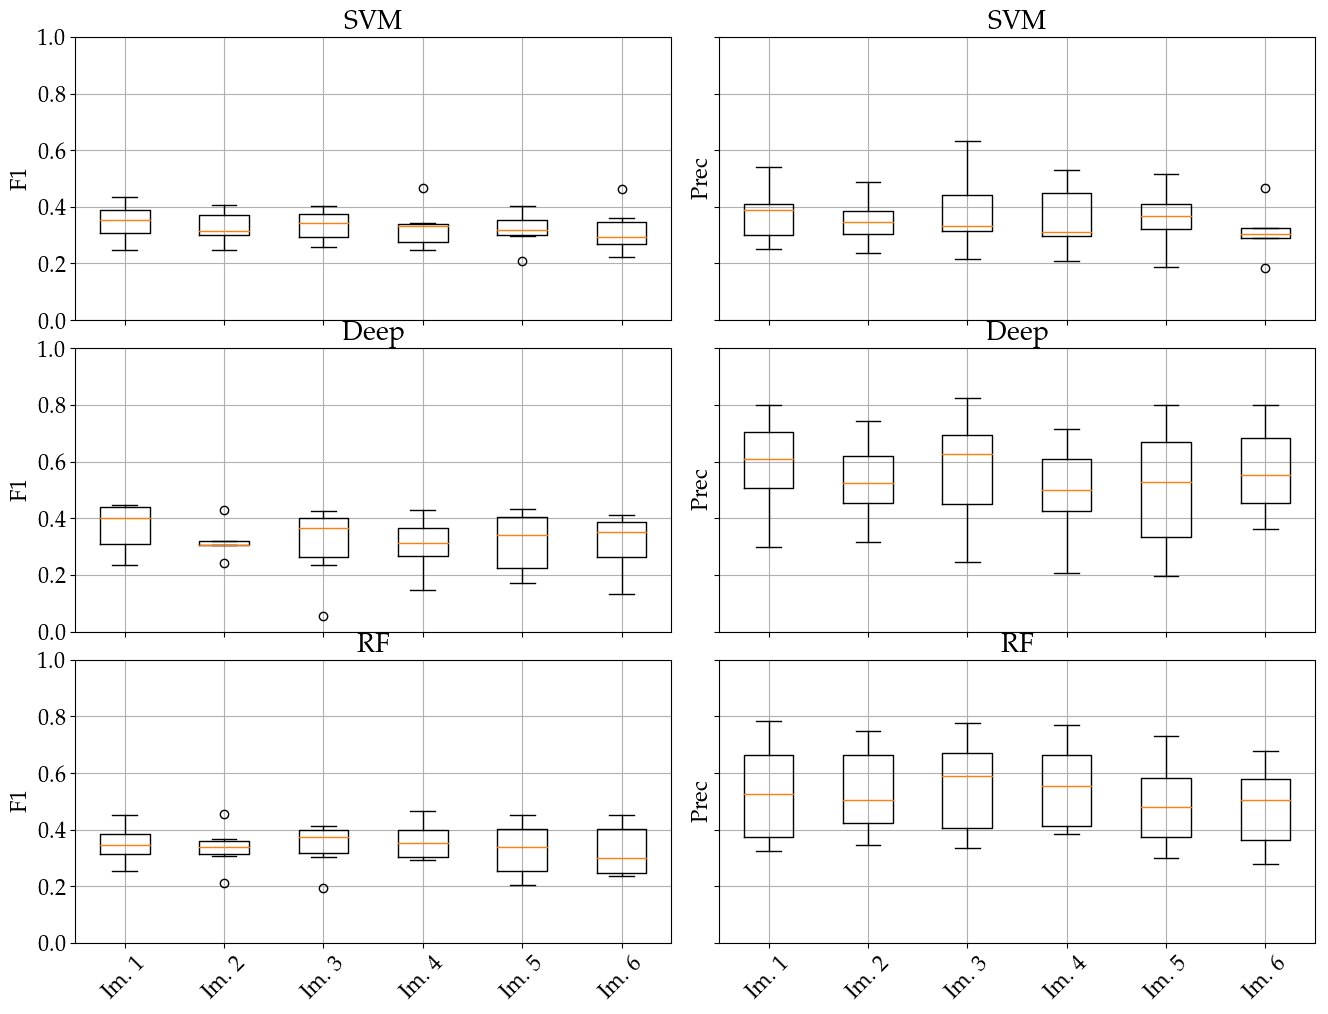

In [14]:
perf_list = [f1_halton_SVM,prec_halton_SVM, f1_halton_Deep, prec_halton_Deep, f1_halton_rf, prec_halton_rf]
titles=["SVM","SVM","Deep","Deep","RF","RF"]
the_thicks = ["Im. 1","Im. 2","Im. 3","Im. 4","Im. 5","Im. 6"]
metrics_name=["F1", "Prec", "F1", "Prec" , "F1","Prec"]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12), sharex=True, sharey=True, dpi=100)
plt.subplots_adjust(wspace=0.08, hspace=0.10)
for i in range(6):
    n_images = 6
    data_list = [None] * n_images
    idx= np.unravel_index([i],[3,2])
    for j in range(n_images):
        mask = perf_list[i][:,j] == 0
        new_data = perf_list[i][:,j][np.invert(mask)]
        data_list[j] = new_data
    
    
    ax[idx[0][0],idx[1][0]].boxplot(data_list)
    ax[idx[0][0],idx[1][0]].grid()
    ax[idx[0][0],idx[1][0]].set_xticks(range(1,7))
    ax[idx[0][0],idx[1][0]].set_xticklabels(the_thicks, rotation=45)
    ax[idx[0][0],idx[1][0]].set_ylabel(metrics_name[i])
    ax[idx[0][0],idx[1][0]].set_ylim([0,1])
    ax[idx[0][0],idx[1][0]].set_title(titles[i])
plt.show()


## Halton Patches: F1 SVM, Deep, Random Forest

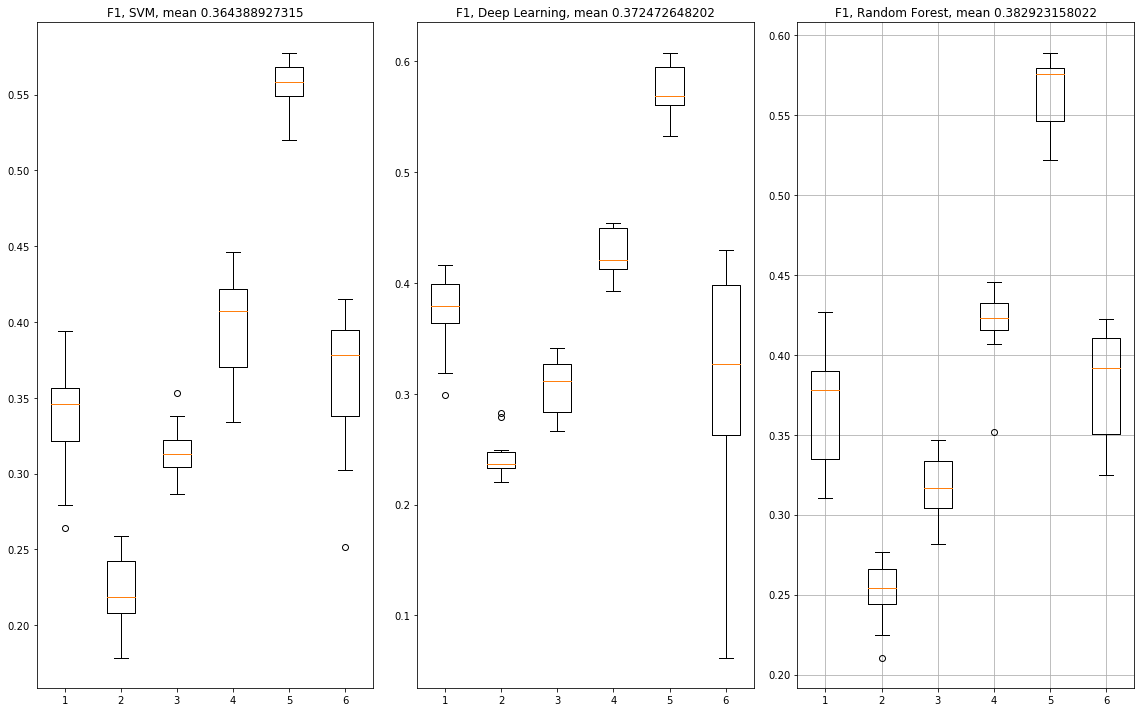

In [63]:
perf_list = [f1_halton_SVM,f1_halton_Deep, f1_halton_rf]
the_thicks = ["Im. 1","Im. 2","Im. 3","Im. 4","Im. 5","Im. 6"]
metrics_name=["","",""]


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
ax1.boxplot(f1_halton_SVM.T)
ax2.boxplot(f1_halton_Deep.T)
ax3.boxplot(f1_halton_rf.T)
    
ax1.set_title('F1, SVM, mean ' + str(f1_halton_SVM.T.mean()) )
ax2.set_title('F1, Deep Learning, mean '+ str(f1_halton_Deep.T.mean()))
ax3.set_title('F1, Random Forest, mean '+ str(f1_halton_rf.T.mean()))

plt.tight_layout()
plt.grid()
plt.show()


## Halton Patches: Precision SVM, Deep, Random Forest

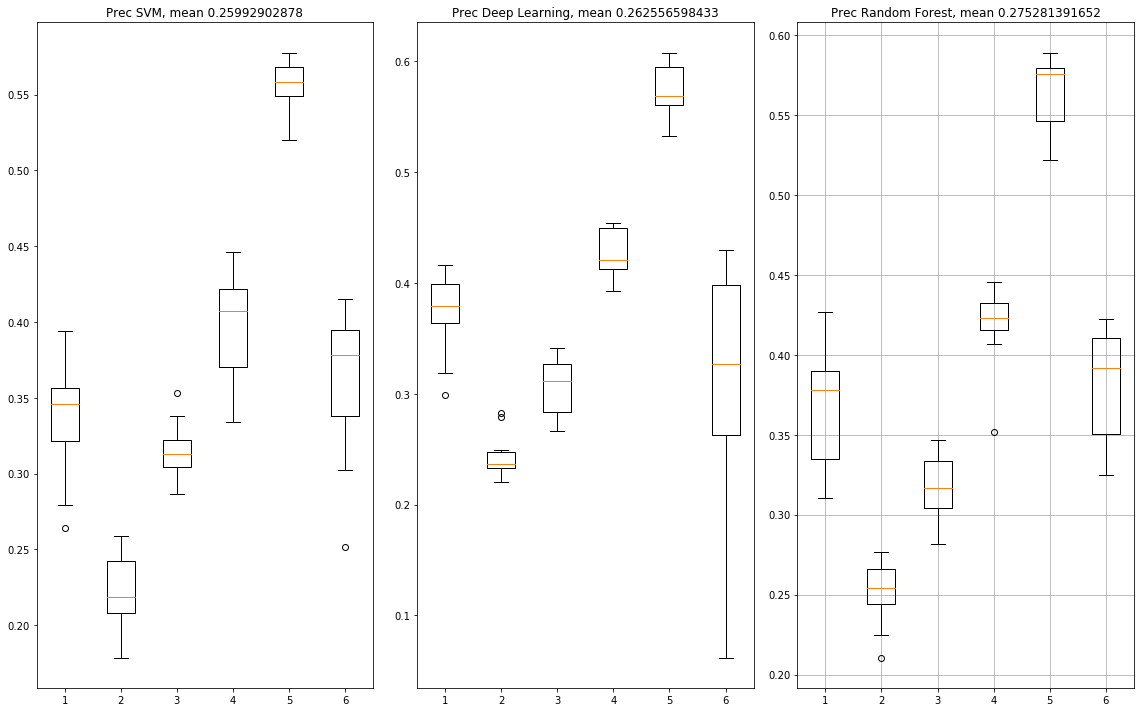

In [64]:
perf_list = [prec_halton_SVM,prec_halton_Deep, prec_halton_rf]
the_thicks = ["Im. 1","Im. 2","Im. 3","Im. 4","Im. 5","Im. 6"]
metrics_name=["","",""]


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
ax1.boxplot(f1_halton_SVM.T)
ax2.boxplot(f1_halton_Deep.T)
ax3.boxplot(f1_halton_rf.T)
    
ax1.set_title('Prec SVM, mean ' + str(prec_halton_SVM.T.mean()) )
ax2.set_title('Prec Deep Learning, mean '+ str(prec_halton_Deep.T.mean()))
ax3.set_title('Prec Random Forest, mean '+ str(prec_halton_rf.T.mean()))

plt.tight_layout()
plt.grid()
plt.show()

In [5]:
f1_random_SVM = np.load("/home/rpezoa/experiment_data/output/f1_random_svm_0.npy")
prec_random_SVM = np.load("/home/rpezoa/experiment_data/output/prec_random_svm_0.npy")

f1_random_Deep = np.load("/home/rpezoa/experiment_data/output/f1_random_deep_0.npy")
prec_random_Deep = np.load("/home/rpezoa/experiment_data/output/prec_random_deep_0.npy")

f1_random_rf = np.load("/home/rpezoa/experiment_data/output/f1_random_rf_0.npy")
prec_random_rf = np.load("/home/rpezoa/experiment_data/output/prec_random_rf_0.npy")

f1_random_knn = np.load("/home/rpezoa/experiment_data/output/f1_random_knn_0.npy")
prec_random_knn = np.load("/home/rpezoa/experiment_data/output/prec_random_knn_0.npy")

f1_random_et = np.load("/home/rpezoa/experiment_data/output/f1_random_et_0.npy")
prec_random_et = np.load("/home/rpezoa/experiment_data/output/prec_random_et_0.npy")

In [16]:
#print(f1_halton_Deep.shape)
PREC = np.zeros((60,5))
PREC[:,0] = prec_halton_SVM.ravel()
PREC[:,1] = prec_halton_Deep.ravel()
PREC[:,2] = prec_halton_rf.ravel()
PREC[:,3] = prec_halton_knn.ravel()
PREC[:,4] = prec_halton_et.ravel()


## F1

[[ 0.32815917  0.30922142  0.34706195  0.32697115  0.34208783]
 [ 0.21804166  0.28919511  0.29427405  0.29432687  0.29811977]]


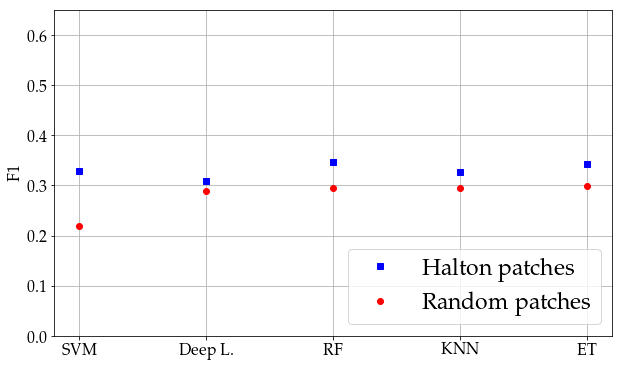

In [6]:
mean_matrix = np.zeros((2,5,2))
mean_matrix[0,0,0] = f1_halton_SVM.mean()
mean_matrix[1,0,0] = f1_random_SVM.mean()
mean_matrix[0,1,0] = f1_halton_Deep.mean()
mean_matrix[1,1,0] = f1_random_Deep.mean()
mean_matrix[0,2,0] = f1_halton_rf.mean()
mean_matrix[1,2,0] = f1_random_rf.mean()
mean_matrix[0,3,0] = f1_halton_knn.mean()
mean_matrix[1,3,0] = f1_random_knn.mean()
mean_matrix[0,4,0] = f1_halton_et.mean()
mean_matrix[1,4,0] = f1_random_et.mean()

print(mean_matrix[:,:,0])

plt.figure(figsize=(10,6))
plt.plot(mean_matrix[0,:,0],'sb',label='Halton patches')
plt.plot(mean_matrix[1,:,0],'or', label="Random patches")
plt.legend(loc='lower right', fontsize='x-large')
plt.grid()
plt.ylabel("F1")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,0.65)
plt.xticks([0,1,2,3,4],["SVM", "Deep L.", "RF", "KNN", "ET"])
plt.show()

In [12]:
print((mean_matrix[0,:,0] - mean_matrix[1,:,0]) / mean_matrix[1,:,0]*100)


[ 50.50296653   6.92484734  17.93834816  11.09116374  14.74845553]


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


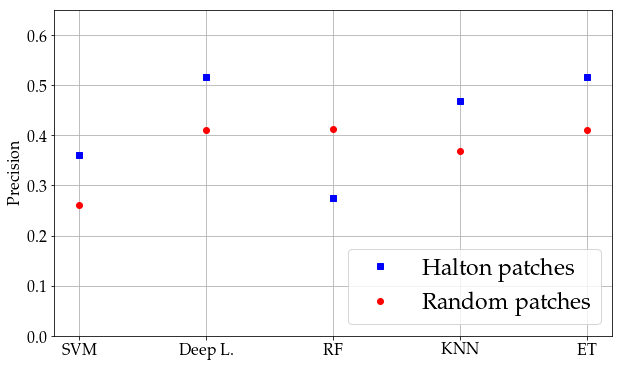

In [8]:
mean_matrix2 = np.zeros((2,5,2))
mean_matrix2[0,0,1] = prec_halton_SVM.mean()
mean_matrix2[1,0,1] = prec_random_SVM.mean()
mean_matrix2[0,1,1] = prec_halton_Deep.mean()
mean_matrix2[1,1,1] = prec_random_Deep.mean()
mean_matrix2[0,2,1] = prec_halton_rf.mean()
mean_matrix2[1,2,1] = prec_random_rf.mean()
mean_matrix2[0,3,1] = prec_halton_knn.mean()
mean_matrix2[1,3,1] = prec_random_knn.mean()
mean_matrix2[0,4,1] = prec_halton_et.mean()
mean_matrix2[1,4,1] = prec_random_et.mean()

print(mean_matrix2[:,:,0])

plt.figure(figsize=(10,6))
plt.plot(mean_matrix2[0,:,1],'sb',label='Halton patches')
plt.plot(mean_matrix2[1,:,1],'or', label="Random patches")
plt.legend(loc='lower right', fontsize='x-large')
plt.grid()
plt.ylabel("Precision")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,0.65)
plt.xticks([0,1,2,3,4],["SVM", "Deep L.", "RF", "KNN", "ET"])
plt.show()

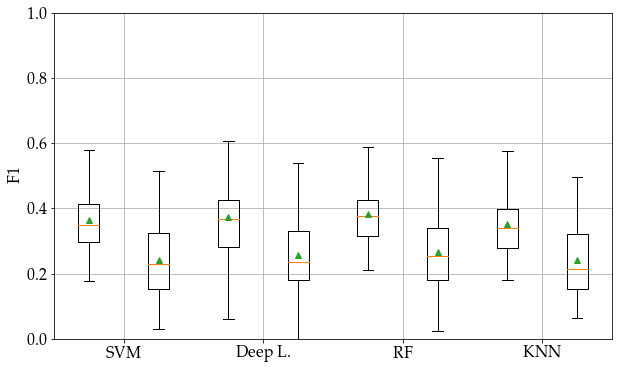

In [138]:
# Check here: https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
plt.figure(figsize=(10,6))
plt.boxplot(F1,showmeans=True, widths=0.3)
plt.grid()
plt.ylabel("F1")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,1)
plt.xticks([1.5,3.5,5.5,7.5],["SVM", "Deep L.", "RF", "KNN"])
plt.show()

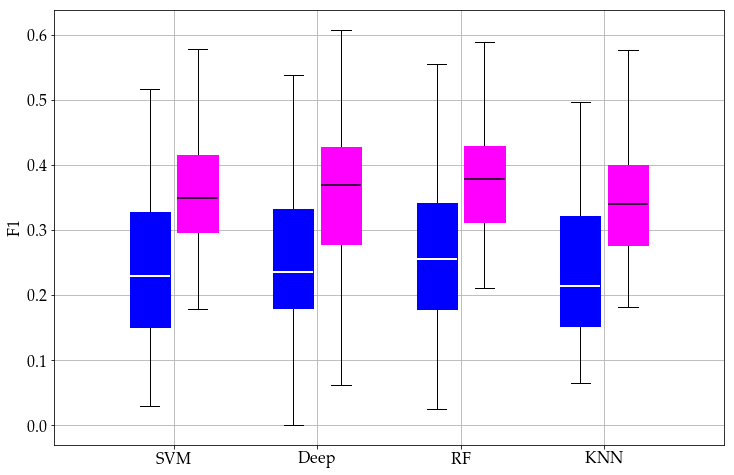

In [153]:
plt.figure(figsize=(12,8))
bp1 = plt.boxplot(F1, positions=[2,5,8,11], widths=0.8,patch_artist=True)
plt.setp(bp1['boxes'], color='magenta', linewidth=3)
for median in bp1['medians']:
    median.set(color='k', linewidth=1.5)


bp2 = plt.boxplot(F1_r, positions=[1,4,7,10],widths=0.8,patch_artist=True)
for median in bp2['medians']:
    median.set(color='w', linewidth=2)

plt.setp(bp2['boxes'], color='blue', linewidth=3)

plt.xticks([1.5, 4.5, 7.5, 10.5],["SVM", "Deep", "RF", "KNN"])
plt.ylabel("F1")
plt.xlim(-1,13)
plt.grid()
plt.title("")
plt.show()


## Halton: SVM performance per image

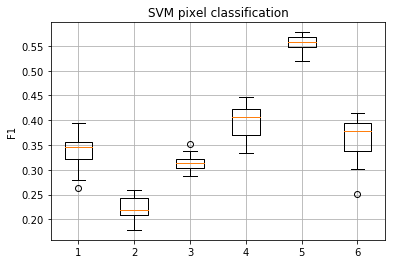

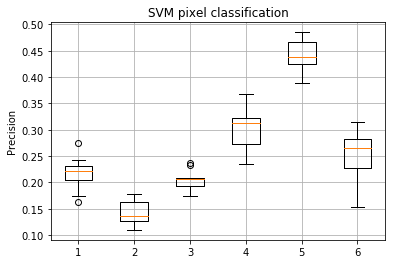

In [14]:
plt.figure()
plt.boxplot(f1_halton_SVM.T)
plt.grid()
plt.title("SVM pixel classification")
plt.ylabel("F1")
plt.show()

plt.figure()
plt.boxplot(prec_halton_SVM.T)
plt.grid()
plt.title("SVM pixel classification")
plt.ylabel("Precision")
plt.show()

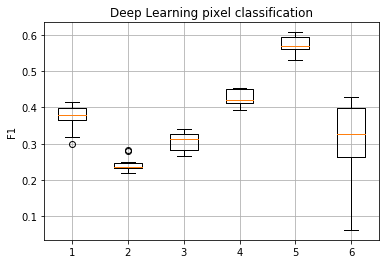

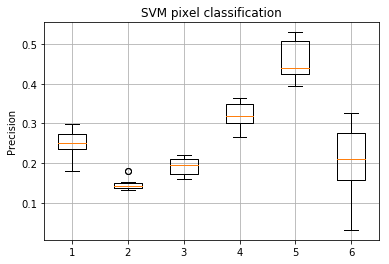

In [15]:
plt.figure()
plt.boxplot(f1_halton_Deep.T)
plt.grid()
plt.title("Deep Learning pixel classification")
plt.ylabel("F1")
plt.show()

plt.figure()
plt.boxplot(prec_halton_Deep.T)
plt.grid()
plt.title("SVM pixel classification")
plt.ylabel("Precision")
plt.show()

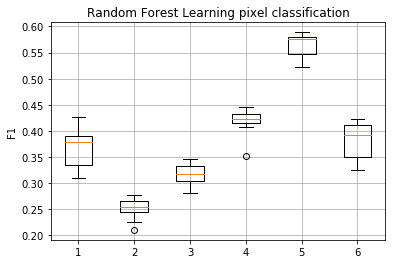

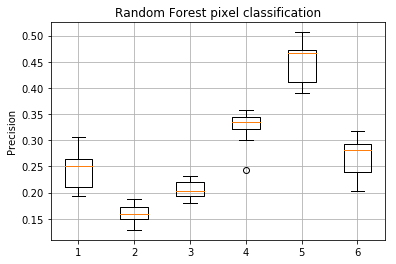

In [18]:
plt.figure()
plt.boxplot(f1_halton_rf.T)
plt.grid()
plt.title("Random Forest Learning pixel classification")
plt.ylabel("F1")
plt.show()

plt.figure()
plt.boxplot(prec_halton_rf.T)
plt.grid()
plt.title("Random Forest pixel classification")
plt.ylabel("Precision")
plt.show()


In [73]:
f1_halton_rf

array([[ 0.39155   ,  0.33189239,  0.31025611,  0.37415754,  0.40933398,
         0.34443663,  0.42689892,  0.38233546,  0.31678953,  0.38399517],
       [ 0.27584455,  0.26833669,  0.24991456,  0.22489585,  0.21061641,
         0.25859224,  0.24321513,  0.24631879,  0.27667819,  0.25805071],
       [ 0.28180397,  0.29777514,  0.33456058,  0.34693544,  0.31326607,
         0.33123161,  0.30072344,  0.33666925,  0.31863453,  0.31481084],
       [ 0.4153228 ,  0.43348572,  0.43633119,  0.4453562 ,  0.42779024,
         0.35178959,  0.41677802,  0.41813565,  0.4297272 ,  0.40688602],
       [ 0.57594909,  0.54303052,  0.5889825 ,  0.57567469,  0.52768943,
         0.52158112,  0.58049404,  0.58356631,  0.5765541 ,  0.55679244],
       [ 0.42222287,  0.3905697 ,  0.39265976,  0.36408341,  0.34556898,
         0.33234047,  0.40498504,  0.32489846,  0.41319871,  0.41242551]])

In [74]:
f1_random_rf

array([[ 0.19301609,  0.26952206,  0.37226854,  0.24583605,  0.33000365,
         0.29869007,  0.19104289,  0.20914861,  0.13665212,  0.27659117],
       [ 0.11518647,  0.15965662,  0.16811891,  0.1988866 ,  0.16103722,
         0.12854884,  0.19856228,  0.14986384,  0.07086614,  0.05905715],
       [ 0.19776019,  0.16841599,  0.19165662,  0.15920506,  0.30223214,
         0.18328258,  0.239331  ,  0.15770182,  0.20825766,  0.12549855],
       [ 0.25150308,  0.11862313,  0.21474573,  0.02497936,  0.26652313,
         0.35112503,  0.22447766,  0.26445957,  0.21085083,  0.25915   ],
       [ 0.53528548,  0.45214832,  0.44405463,  0.48856556,  0.33634797,
         0.5555678 ,  0.41567351,  0.35616082,  0.52434665,  0.43631315],
       [ 0.27140801,  0.29737543,  0.38030048,  0.33264384,  0.30097966,
         0.32918709,  0.39529521,  0.37602881,  0.41474137,  0.26277236]])